# Homework#2

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Mounted at /content/drive


In [2]:
tada_eta = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/tada_eta.xlsx')
tada_eta.head()

,ATA,id,api_eta,created_at_kst,month,pickup_lng,pickup_lat,pickup_gu,driver_id,driver_lng,driver_lat,hour
0,10.60,R4L9FL6NVEL4D0,5.65,2019-12-01T00:55:09,12,127.091399,37.624545,노원구,DST52944,127.069978,37.616472,0
1,9.20,R3A7JBY7CS6TPD,8.60,2019-12-01T00:09:39,12,127.023351,37.625564,강북구,DPC72995,127.026479,37.604711,0
2,10.85,R2BIUY1TDK14XE,10.53,2019-12-15T00:18:42,12,126.881154,37.481641,금천구,DPP94923,126.906225,37.452167,0
3,5.52,R31PU5GNHSGU6C,1.92,2019-07-31T00:24:11,7,126.988375,37.567897,중구,DCT73585,126.991170,37.566416,0
4,8.60,R41WR6N1VT42DJ,7.10,2019-07-05T00:40:34,7,126.988684,37.566716,중구,DPJ86237,127.006860,37.571164,0


In [3]:
# 불필요한 feature 제거 및 distance feature 추가
eta1 = tada_eta.drop(['id', 'created_at_kst', 'month', 'pickup_lng', 'pickup_lat', 'pickup_gu', 'driver_id', 'driver_lng', 'driver_lat'], 1)
eta1['distance'] = ((tada_eta['pickup_lat']-tada_eta['driver_lat'])**2 + (tada_eta['pickup_lng']-tada_eta['driver_lng'])**2)*10000
eta1.head()

,ATA,api_eta,hour,distance
0,10.60,5.65,0,5.240020
1,9.20,8.60,0,4.446589
2,10.85,10.53,0,14.973154
3,5.52,1.92,0,0.100054
4,8.60,7.10,0,3.501480


In [4]:
import numpy as np
train = eta1[:12000]
test = eta1[12000:]
x_tn = np.asarray(train.drop('ATA', 1))
x_te = np.asarray(test.drop('ATA', 1))
y_tn = np.asarray(train['ATA'])
y_te = np.asarray(test['ATA'])
eta_features = [x for i, x in enumerate(eta1.columns) if i != 0]

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble

In [6]:
params1 = {
    'n_estimators' : 100,
    'max_depth' : 3,
    'min_samples_leaf' : 5,
    'learning_rate' : 0.05,
    'loss' : 'ls'
}

In [7]:
reg1 = ensemble.GradientBoostingRegressor(**params1)

reg1.fit(x_tn, y_tn)

print("Errors of Regression model #1")
mse = mean_squared_error(y_te, reg1.predict(x_te))
print("The mean squared error(MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_te, x_te[:,0]) ))

mae = mean_absolute_error(y_te, reg1.predict(x_te))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_te, x_te[:,0]) ))

Errors of Regression model #1
The mean squared error(MSE) on test set: 6.8428
The initial error of API ETA on test set: 8.8452
The mean absolute error (MAE) on test set: 2.0255
The initial error of API ETA on test set: 2.0851


In [8]:
params2 = {
    'n_estimators' : 100,
    'max_depth' : 4,
    'min_samples_leaf' : 5,
    'learning_rate' : 0.05,
    'loss' : 'ls'
}

In [9]:
reg2 = ensemble.GradientBoostingRegressor(**params2)

reg2.fit(x_tn, y_tn)

print("Errors of Regression model #2")
mse = mean_squared_error(y_te, reg2.predict(x_te))
print("The mean squared error(MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_te, x_te[:,0]) ))

mae = mean_absolute_error(y_te, reg2.predict(x_te))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_te, x_te[:,0]) ))

Errors of Regression model #2
The mean squared error(MSE) on test set: 6.8122
The initial error of API ETA on test set: 8.8452
The mean absolute error (MAE) on test set: 2.0128
The initial error of API ETA on test set: 2.0851


In [10]:
params3 = {
    'n_estimators' : 100,
    'max_depth' : 3,
    'min_samples_leaf' : 10,
    'learning_rate' : 0.05,
    'loss' : 'ls'
}

In [11]:
reg3 = ensemble.GradientBoostingRegressor(**params3)

reg3.fit(x_tn, y_tn)

print("Errors of Regression model #3")
mse = mean_squared_error(y_te, reg3.predict(x_te))
print("The mean squared error(MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_te, x_te[:,0]) ))

mae = mean_absolute_error(y_te, reg3.predict(x_te))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_te, x_te[:,0]) ))

Errors of Regression model #3
The mean squared error(MSE) on test set: 6.8480
The initial error of API ETA on test set: 8.8452
The mean absolute error (MAE) on test set: 2.0290
The initial error of API ETA on test set: 2.0851


In [12]:
params4 = {
    'n_estimators' : 100,
    'max_depth' : 3,
    'min_samples_leaf' : 10,
    'learning_rate' : 0.01,
    'loss' : 'ls'
}

In [13]:
reg4 = ensemble.GradientBoostingRegressor(**params4)

reg4.fit(x_tn, y_tn)

print("Errors of Regression model #4")
mse = mean_squared_error(y_te, reg4.predict(x_te))
print("The mean squared error(MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_te, x_te[:,0]) ))

mae = mean_absolute_error(y_te, reg4.predict(x_te))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_te, x_te[:,0]) ))

Errors of Regression model #4
The mean squared error(MSE) on test set: 7.4636
The initial error of API ETA on test set: 8.8452
The mean absolute error (MAE) on test set: 2.1616
The initial error of API ETA on test set: 2.0851


In [14]:
params5 = {
    'n_estimators' : 100,
    'max_depth' : 3,
    'min_samples_leaf' : 10,
    'learning_rate' : 0.1,
    'loss' : 'ls'
}

In [15]:
reg5 = ensemble.GradientBoostingRegressor(**params5)

reg5.fit(x_tn, y_tn)

print("Errors of Regression model #5")
mse = mean_squared_error(y_te, reg5.predict(x_te))
print("The mean squared error(MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_te, x_te[:,0]) ))

mae = mean_absolute_error(y_te, reg5.predict(x_te))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_te, x_te[:,0]) ))

Errors of Regression model #5
The mean squared error(MSE) on test set: 6.7913
The initial error of API ETA on test set: 8.8452
The mean absolute error (MAE) on test set: 2.0005
The initial error of API ETA on test set: 2.0851


In [16]:
params6 = {
    'n_estimators' : 150,
    'max_depth' : 3,
    'min_samples_leaf' : 10,
    'learning_rate' : 0.1,
    'loss' : 'ls'
}

In [17]:
reg6 = ensemble.GradientBoostingRegressor(**params6)

reg6.fit(x_tn, y_tn)

print("Errors of Regression model #6")
mse = mean_squared_error(y_te, reg6.predict(x_te))
print("The mean squared error(MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_te, x_te[:,0]) ))

mae = mean_absolute_error(y_te, reg6.predict(x_te))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_te, x_te[:,0]) ))

Errors of Regression model #6
The mean squared error(MSE) on test set: 6.7703
The initial error of API ETA on test set: 8.8452
The mean absolute error (MAE) on test set: 1.9958
The initial error of API ETA on test set: 2.0851


In [18]:
params7 = {
    'n_estimators' : 75,
    'max_depth' : 3,
    'min_samples_leaf' : 10,
    'learning_rate' : 0.1,
    'loss' : 'ls'
}

In [19]:
reg7 = ensemble.GradientBoostingRegressor(**params7)

reg7.fit(x_tn, y_tn)

print("Errors of Regression model #7")
mse = mean_squared_error(y_te, reg7.predict(x_te))
print("The mean squared error(MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_te, x_te[:,0]) ))

mae = mean_absolute_error(y_te, reg7.predict(x_te))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_te, x_te[:,0]) ))

Errors of Regression model #7
The mean squared error(MSE) on test set: 6.8246
The initial error of API ETA on test set: 8.8452
The mean absolute error (MAE) on test set: 2.0094
The initial error of API ETA on test set: 2.0851


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

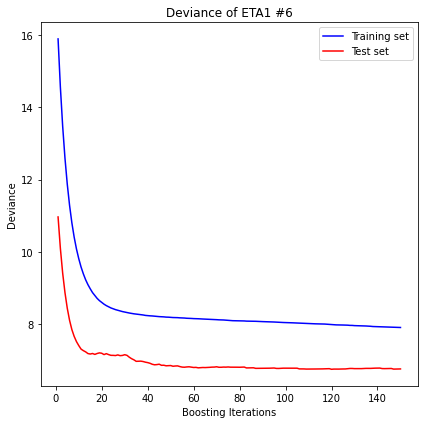

In [21]:
test_score = np.zeros((params6['n_estimators'],), dtype = np.float64)
for i, y_pred in enumerate(reg6.staged_predict(x_te)):
    test_score[i] = reg6.loss_(y_te, y_pred)

fig = plt.figure(figsize = (6,6))
plt.subplot(1,1,1)
plt.title('Deviance of ETA1 #6')
plt.plot(np.arange(params6['n_estimators']) + 1, reg6.train_score_, 'b-', label = 'Training set')
plt.plot(np.arange(params6['n_estimators']) + 1, test_score, 'r-', label = 'Test set')
plt.legend(loc = 'upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

fig.tight_layout()
plt.show()

#### One-hot encoding : too sparse

In [22]:
eta2 = tada_eta.drop(['id', 'created_at_kst', 'month', 'pickup_lng', 'pickup_lat', 'pickup_gu', 'driver_id', 'driver_lng', 'driver_lat'], 1)
eta2['distance'] = ((tada_eta['pickup_lat']-tada_eta['driver_lat'])**2 + (tada_eta['pickup_lng']-tada_eta['driver_lng'])**2)*10000
eta2.head()

,ATA,api_eta,hour,distance
0,10.60,5.65,0,5.240020
1,9.20,8.60,0,4.446589
2,10.85,10.53,0,14.973154
3,5.52,1.92,0,0.100054
4,8.60,7.10,0,3.501480


In [23]:
pickup_gu = pd.get_dummies(tada_eta['pickup_gu'])

print(eta2.shape)
print(pickup_gu.shape)

(13916, 4)
(13916, 25)


In [24]:
eta2 = pd.concat([eta2, pickup_gu], axis = 1)
eta2.head()

,ATA,api_eta,hour,distance,강남구,강동구,강북구,강서구,관악구,광진구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,10.60,5.65,0,5.240020,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.20,8.60,0,4.446589,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10.85,10.53,0,14.973154,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.52,1.92,0,0.100054,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,8.60,7.10,0,3.501480,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
import numpy as np
train2 = eta2[:12000]
test2 = eta2[12000:]
x_tn2 = np.asarray(train2.drop('ATA', 1))
x_te2 = np.asarray(test2.drop('ATA', 1))
y_tn2 = np.asarray(train2['ATA'])
y_te2 = np.asarray(test2['ATA'])
eta_features2 = [x for i, x in enumerate(eta2.columns) if i != 0]

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import ensemble

In [27]:
params1 = {
    'n_estimators' : 100,
    'max_depth' : 3,
    'min_samples_leaf' : 5,
    'learning_rate' : 0.05,
    'loss' : 'ls'
}

In [28]:
reg1 = ensemble.GradientBoostingRegressor(**params1)

reg1.fit(x_tn2, y_tn2)

print("Errors of Regression model #1")
mse = mean_squared_error(y_te2, reg1.predict(x_te2))
print("The mean squared error(MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_te2, x_te2[:,0]) ))

mae = mean_absolute_error(y_te2, reg1.predict(x_te2))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_te2, x_te2[:,0]) ))

Errors of Regression model #1
The mean squared error(MSE) on test set: 6.8609
The initial error of API ETA on test set: 8.8452
The mean absolute error (MAE) on test set: 2.0296
The initial error of API ETA on test set: 2.0851


In [29]:
params5 = {
    'n_estimators' : 100,
    'max_depth' : 3,
    'min_samples_leaf' : 10,
    'learning_rate' : 0.1,
    'loss' : 'ls'
}

In [30]:
reg5 = ensemble.GradientBoostingRegressor(**params5)

reg5.fit(x_tn2, y_tn2)

print("Errors of Regression model #5")
mse = mean_squared_error(y_te2, reg5.predict(x_te2))
print("The mean squared error(MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_te2, x_te2[:,0]) ))

mae = mean_absolute_error(y_te2, reg5.predict(x_te2))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_te2, x_te2[:,0]) ))

Errors of Regression model #5
The mean squared error(MSE) on test set: 6.7401
The initial error of API ETA on test set: 8.8452
The mean absolute error (MAE) on test set: 1.9920
The initial error of API ETA on test set: 2.0851


In [31]:
params6 = {
    'n_estimators' : 150,
    'max_depth' : 3,
    'min_samples_leaf' : 10,
    'learning_rate' : 0.1,
    'loss' : 'ls'
}

In [32]:
reg6 = ensemble.GradientBoostingRegressor(**params6)

reg6.fit(x_tn2, y_tn2)

print("Errors of Regression model #6")
mse = mean_squared_error(y_te2, reg6.predict(x_te2))
print("The mean squared error(MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_te2, x_te2[:,0]) ))

mae = mean_absolute_error(y_te2, reg6.predict(x_te2))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_te2, x_te2[:,0]) ))

Errors of Regression model #6
The mean squared error(MSE) on test set: 6.7430
The initial error of API ETA on test set: 8.8452
The mean absolute error (MAE) on test set: 1.9861
The initial error of API ETA on test set: 2.0851


In [33]:
params7 = {
    'n_estimators' : 75,
    'max_depth' : 3,
    'min_samples_leaf' : 10,
    'learning_rate' : 0.1,
    'loss' : 'ls'
}

In [34]:
reg7 = ensemble.GradientBoostingRegressor(**params7)

reg7.fit(x_tn2, y_tn2)

print("Errors of Regression model #7")
mse = mean_squared_error(y_te2, reg7.predict(x_te2))
print("The mean squared error(MSE) on test set: {:.4f}".format(mse))
print("The initial error of API ETA on test set: {:.4f}".format(mean_squared_error(y_te2, x_te2[:,0]) ))

mae = mean_absolute_error(y_te2, reg7.predict(x_te2))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))
print("The initial error of API ETA on test set: {:.4f}".format(mean_absolute_error(y_te2, x_te2[:,0]) ))

Errors of Regression model #7
The mean squared error(MSE) on test set: 6.7723
The initial error of API ETA on test set: 8.8452
The mean absolute error (MAE) on test set: 2.0026
The initial error of API ETA on test set: 2.0851


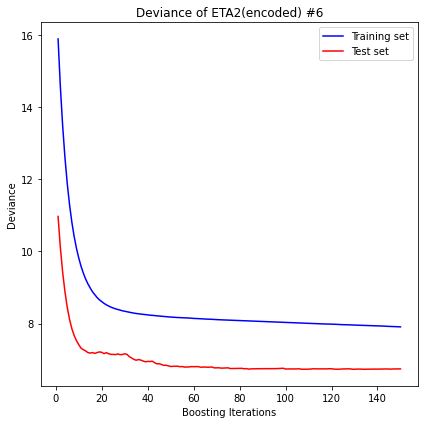

In [35]:
test_score2 = np.zeros((params6['n_estimators'],), dtype = np.float64)
for j, y_pred2 in enumerate(reg6.staged_predict(x_te2)):
    test_score2[j] = reg6.loss_(y_te2, y_pred2)

fig = plt.figure(figsize = (6,6))
plt.subplot(1,1,1)
plt.title('Deviance of ETA2(encoded) #6')
plt.plot(np.arange(params6['n_estimators']) + 1, reg6.train_score_, 'b-', label = 'Training set')
plt.plot(np.arange(params6['n_estimators']) + 1, test_score2, 'r-', label = 'Test set')
plt.legend(loc = 'upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

fig.tight_layout()
plt.show()